<a href="https://colab.research.google.com/github/stormliucong/Tensor-Puzzles/blob/main/Tensor%20Puzzlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Puzzles
- by [Sasha Rush](http://rush-nlp.com) - [srush_nlp](https://twitter.com/srush_nlp) (with Marcos Treviso)





When learning a tensor programming language like PyTorch or Numpy it
is tempting to rely on the standard library (or more honestly
StackOverflow) to find a magic function for everything.  But in
practice, the tensor language is extremely expressive, and you can
do most things from first principles and clever use of broadcasting.



This is a collection of 16 tensor puzzles. Like chess puzzles these are
not meant to simulate the complexity of a real program, but to practice
in a simplified environment. Each puzzle asks you to reimplement one
function in the NumPy standard library without magic. 

Check code [here](https://github.com/pytorch/pytorch/blob/effe1425dd698dda2497e9ce25f5c1655b33ecc4/functorch/dim/README.md?plain=1#L634)

In [ ]:
# !pip install -qqq torchtyping hypothesis pytest git+https://github.com/danoneata/chalk@srush-patch-1
# !wget -q https://github.com/srush/Tensor-Puzzles/raw/main/lib.py

In [5]:
# from lib import draw_examples, make_test, run_test
import torch
import numpy as np
# from torchtyping import TensorType as TT
tensor = torch.tensor

## Rules

1. These puzzles are about *broadcasting*. Know this rule.

![](https://pbs.twimg.com/media/FQywor0WYAssn7Y?format=png&name=large)

2. Each puzzle needs to be solved in 1 line (<80 columns) of code.
3. You are allowed @, arithmetic, comparison, `shape`, any indexing (e.g. `a[:j], a[:, None], a[arange(10)]`), and previous puzzle functions.
4. You are *not allowed* anything else. No `view`, `sum`, `take`, `squeeze`, `tensor`.

5. You can start with these two functions:

In [52]:
def arange(i: int):
    "Use this function to replace a for-loop."
    return torch.tensor(range(i))

# draw_examples("arange", [{"" : arange(i)} for i in [5, 3, 9]])

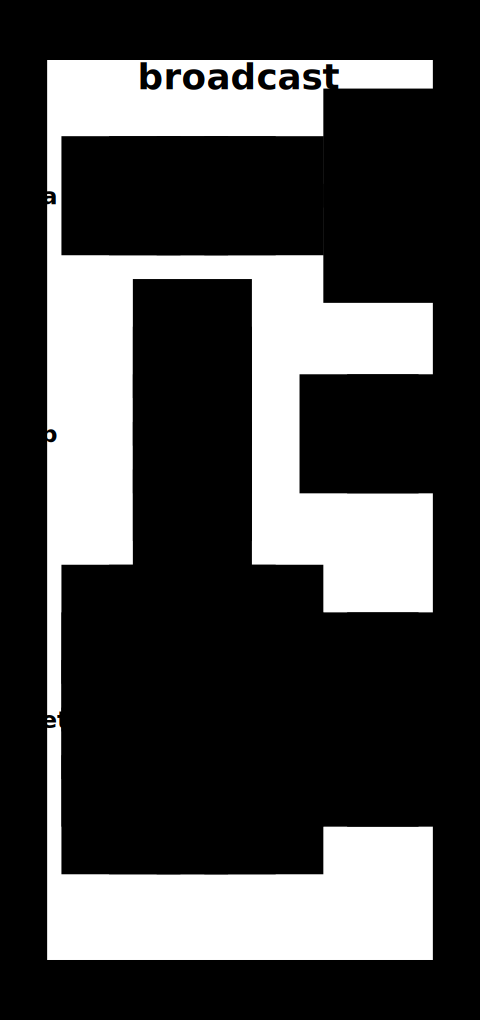

In [ ]:
# Example of broadcasting.
examples = [(arange(4), arange(5)[:, None]) ,
            (arange(3)[:, None], arange(2))]
draw_examples("broadcast", [{"a": a, "b":b, "ret": a + b} for a, b in examples])

In [11]:
tensor(range(5)) + tensor(range(3))[:,None]

tensor([[0, 1, 2, 3, 4],
        [1, 2, 3, 4, 5],
        [2, 3, 4, 5, 6]])

In [69]:
def where(q, a, b):
    "Use this function to replace an if-statement."
    return (q * a) + (~q) * b

# In diagrams, orange is positive/True, where is zero/False, and blue is negative.

examples = [(tensor([False]), tensor([10]), tensor([0])),
            (tensor([False, True]), tensor([1, 1]), tensor([-10, 0])),
            (tensor([False, True]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([[0], [10]]), tensor([-10, 0])),
           ]
# draw_examples("where", [{"q": q, "a":a, "b":b, "ret": where(q, a, b)} for q, a, b in examples])

In [70]:
q = tensor([[False, True], [True, False]])
a = tensor([[0], [10]])
b = tensor([-10, 0])
where(q,a,b)


tensor([[-10,   0],
        [ 10,   0]])

In [74]:
q * a

tensor([[ 0,  0],
        [10,  0]])

## Puzzle 1 - ones

Compute [ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) - the vector of all ones.

In [62]:
def ones_spec(out):
    for i in range(len(out)):
        out[i] = 1
        
def ones(i: int):
  return (arange(i) == arange(i)) * 1

# test_ones = make_test("one", ones, ones_spec, add_sizes=["i"])

In [63]:
i = 10
ones(i)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# run_test(test_ones)

## Puzzle 2 - sum

Compute [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) - the sum of a vector.

In [64]:
def sum_spec(a, out):
    out[0] = 0
    for i in range(len(a)):
        out[0] += a[i]
        
def sum(a):
    return ones(a.shape[0]) @ a

# test_sum = make_test("sum", sum, sum_spec)

In [65]:
a = tensor([1,2,3,4])
sum(a)

tensor(10)

In [ ]:
# run_test(test_sum)

## Puzzle 3 - outer

Compute [outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) - the outer product of two vectors.

In [67]:
def outer_spec(a, b, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            out[i][j] = a[i] * b[j]
            
def outer(a,b):
  return a * b[:,None]
    
# test_outer = make_test("outer", outer, outer_spec)

In [68]:
a = tensor([1,2])
b = tensor([2,3,4])
outer(a, b)

tensor([[2, 4],
        [3, 6],
        [4, 8]])

In [ ]:
# run_test(test_outer)

## Puzzle 4 - diag

Compute [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) - the diagonal vector of a square matrix.

In [98]:
from traitlets.config.application import T
def diag_spec(a, out):
    for i in range(len(a)):
        out[i] = a[i][i]
        
def diag(a):
  return a * (arange(a.shape[0])[:,None] == arange(a.shape[0]))


# test_diag = make_test("diag", diag, diag_spec)

In [99]:
a = tensor([[1,2,3],[4,5,6],[4,5,6]])
diag(a)

tensor([[1, 0, 0],
        [0, 5, 0],
        [0, 0, 6]])

In [ ]:
# run_test(test_diag)

## Puzzle 5 - eye

Compute [eye](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) - the identity matrix.

In [88]:
def eye_spec(out):
    for i in range(len(out)):
        out[i][i] = 1
        
def eye(j):
  return (arange(j)[:,None] == arange(j)) * 1
    
    
# test_eye = make_test("eye", eye, eye_spec, add_sizes=["j"])

In [89]:
j = 10
eye(10)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
# run_test(test_eye)

## Puzzle 6 - triu

Compute [triu](https://numpy.org/doc/stable/reference/generated/numpy.triu.html) - the upper triangular matrix.

In [100]:
def triu_spec(out):
    for i in range(len(out)):
        for j in range(len(out)):
            if i <= j:
                out[i][j] = 1
            else:
                out[i][j] = 0
                
def triu(j: int):
    return (arange(j) >= arange(j)[:,None]) * 1


# test_triu = make_test("triu", triu, triu_spec, add_sizes=["j"])

In [101]:
# run_test(test_triu)
j = 5
triu(5)

tensor([[1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1]])

## Puzzle 7 - cumsum

Compute [cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) - the cumulative sum.

In [104]:
def cumsum_spec(a, out):
    total = 0
    for i in range(len(out)):
        out[i] = total + a[i]
        total += a[i]

def cumsum(a):
  return a @ triu(a.shape[0])

# test_cumsum = make_test("cumsum", cumsum, cumsum_spec)

In [105]:
a = tensor([1,2,3])
cumsum(a)

tensor([1, 3, 6])

In [ ]:
# run_test(test_cumsum)

## Puzzle 8 - diff

Compute [diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) - the running difference.

In [186]:
def diff_spec(a, out):
    out[0] = a[0]
    for i in range(1, len(out)):
        out[i] = a[i] - a[i - 1]

def diff(a):
    return where((arange(a.shape[0])>0), (a[arange(a.shape[0])] - a[arange(a.shape[0])-1]), a[arange(a.shape[0])])

# test_diff = make_test("diff", diff, diff_spec, add_sizes=["i"])

In [187]:
a = tensor([1, 5, 8])
diff(a) 

tensor([1, 4, 3])

## Puzzle 9 - vstack

Compute [vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) - the matrix of two vectors

In [161]:
def vstack_spec(a, b, out):
    for i in range(len(out[0])):
        out[0][i] = a[i]
        out[1][i] = b[i]

def vstack(a, b):
    return where(outer(ones(a.shape[0]),arange(2)) == 1, b, a)


# test_vstack = make_test("vstack", vstack, vstack_spec)

In [181]:
(a).shape

torch.Size([3])

In [162]:
a = tensor([1,2,3,4])
b = tensor([2,3,4,5])
vstack(a,b)

tensor([[1, 2, 3, 4],
        [2, 3, 4, 5]])

In [ ]:
# run_test(test_vstack)

## Puzzle 10 - roll

Compute [roll](https://numpy.org/doc/stable/reference/generated/numpy.roll.html) - the vector shifted 1 circular position.

In [191]:
def roll_spec(a, out):
    for i in range(len(out)):
        if i + 1 < len(out):
            out[i] = a[i + 1]
        else:
            out[i] = a[i + 1 - len(out)]
            
def roll(a):
    return a[arange(a.shape[0])-1]


# test_roll = make_test("roll", roll, roll_spec, add_sizes=["i"])

In [192]:
a = tensor([1,2,3,4,5])
roll(a)

tensor([5, 1, 2, 3, 4])

## Puzzle 11 - flip

Compute [flip](https://numpy.org/doc/stable/reference/generated/numpy.flip.html) - the reversed vector

In [196]:
def flip_spec(a, out):
    for i in range(len(out)):
        out[i] = a[len(out) - i - 1]
        
def flip(a):
    return a[-(arange(a.shape[0])+1)]


# test_flip = make_test("flip", flip, flip_spec, add_sizes=["i"])

In [197]:
# run_test(test_flip)
a = tensor([1,2,3,4,5])
flip(a)

tensor([5, 4, 3, 2, 1])

## Puzzle 12 - compress


Compute [compress](https://numpy.org/doc/stable/reference/generated/numpy.compress.html) - keep only masked entries (left-aligned).

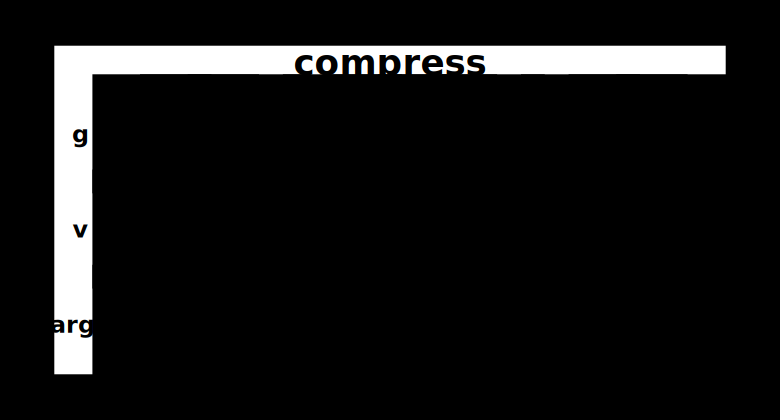

In [ ]:
def compress_spec(g, v, out):
    j = 0
    for i in range(len(g)):
        if g[i]:
            out[j] = v[i]
            j += 1
            
def compress(g, v):
    return where(v , g, 0)


test_compress = make_test("compress", compress, compress_spec, add_sizes=["i"])

In [ ]:
g = tensor([0,1,0,1,1])
v = tensor([0,2,4,0,6])


## Puzzle 13 - pad_to


Compute pad_to - eliminate or add 0s to change size of vector.

In [207]:
def pad_to_spec(a, out):
    for i in range(min(len(out), len(a))):
        out[i] = a[i]


def pad_to(a,j):
    return where(j < a.shape[0],0,a[arange(j))]

# test_pad_to = make_test("pad_to", pad_to, pad_to_spec, add_sizes=["i", "j"])

In [209]:
# run_test(test_pad_to)
a = tensor([1,2,3,4,5])
j = 10
pad_to(a,j)

tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [2, 2, 2, 2, 2, 2, 0, 0, 0, 0],
        [3, 3, 3, 3, 3, 3, 0, 0, 0, 0],
        [4, 4, 4, 4, 4, 4, 0, 0, 0, 0],
        [5, 5, 5, 5, 5, 5, 0, 0, 0, 0]])

In [241]:
(arange(j)[:,None]<= a.shape[0])

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False]])

In [232]:
(arange(j)[:,None]<= a.shape[0]).shape

torch.Size([10, 1])

## Puzzle 14 - sequence_mask


Compute [sequence_mask](https://www.tensorflow.org/api_docs/python/tf/sequence_mask) - pad out to length per batch.

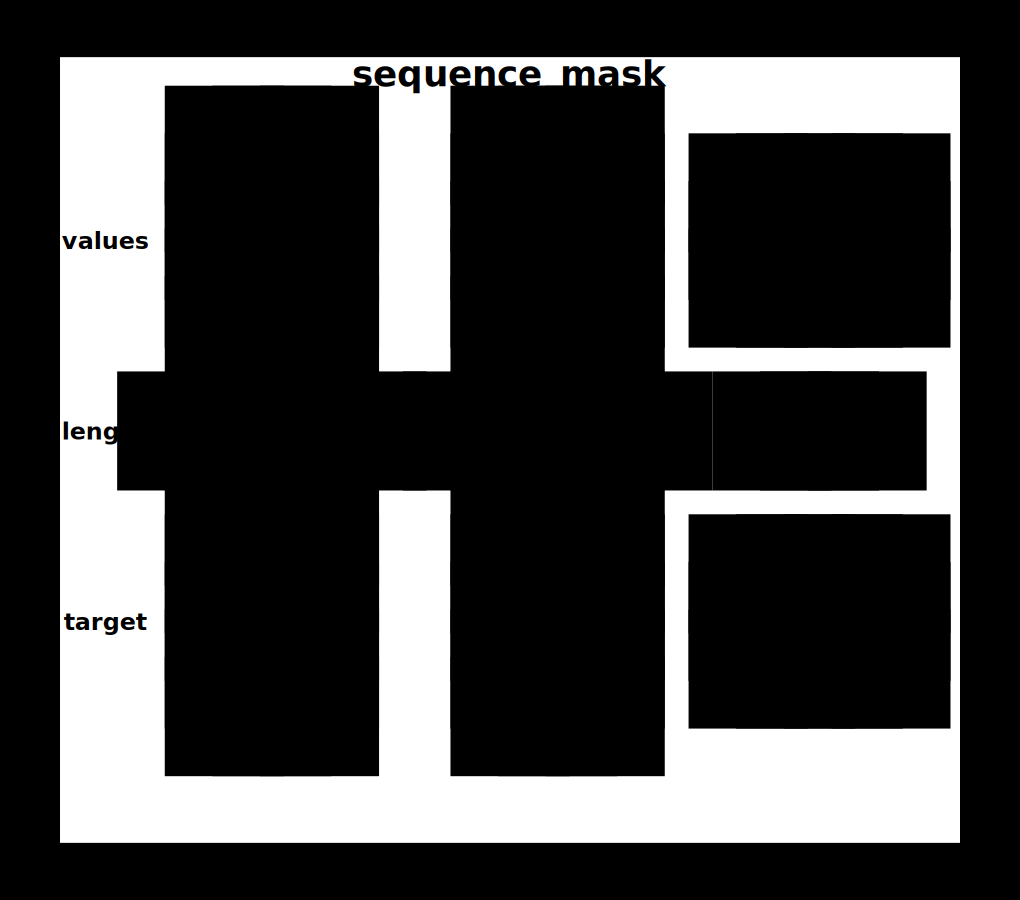

In [ ]:
def sequence_mask_spec(values, length):
    for i in range(len(out)):
        for j in range(len(out[0])):
            if j < length[i]:
                out[i][j] = values[i][j]
            else:
                out[i][j] = 0
    return out
    
def sequence_mask(values: TT["i", "j"], length: TT["i", int]) -> TT["i", "j"]:
    raise NotImplementedError


def constraint_set_length(d):
    d["length"] = d["length"] % d["values"].shape[1]
    return d


test_sequence = make_test("sequence_mask",
    sequence_mask, sequence_mask_spec, constraint=constraint_set_length
)

In [ ]:
# run_test(test_sequence)
values = tensor([[1,2,3,4,5],[3,1,4,6,1],[1,0,3,1,1]])
length = tensor([1,1,0,1,0])
sequence_mask_spec(values, len)

## Puzzle 15 - bincount

Compute [bincount](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html) - count number of times an entry was seen.

In [260]:
# a.shape = 1*m
# out.shape = 1*max(a)
# 1*m * m * max(a) -> need a m * max(a)
# count each row for each number arranage(j) == a[:,None]

def bincount_spec(a, out):
    for i in range(len(a)):
        out[a[i]] += 1
        
def bincount(a, j: int):
    return ones(a.shape[0])[None,:] @ ((a[:,None]==arange(j))*1)


def constraint_set_max(d):
    d["a"] = d["a"] % d["return"].shape[0]
    return d


# test_bincount = make_test("bincount",
#     bincount, bincount_spec, add_sizes=["j"], constraint=constraint_set_max
# )

In [261]:
a = tensor([1,2,1,4,2,1,6,9])
j = 5
bincount(a,j)

tensor([[0, 3, 2, 0, 1]])

In [243]:
# run_test(test_bincount)

tensor([[False,  True, False, False, False, False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False, False],
        [False, False, False, False, False, False,  True, False, False, False],
        [False,  True, False, False, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False, False]])

## Puzzle 16 - scatter_add

Compute [scatter_add](https://pytorch-scatter.readthedocs.io/en/1.3.0/functions/add.html) - add together values that link to the same location.

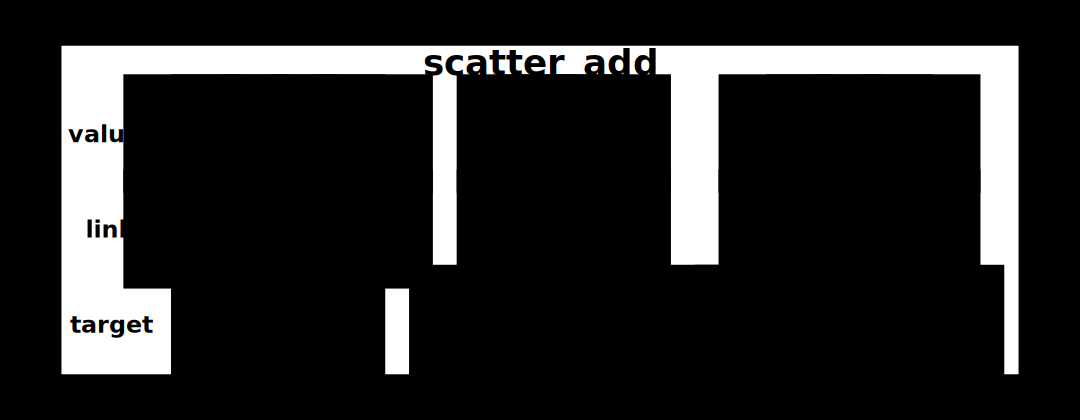

In [ ]:
def scatter_add_spec(values, link, out):
    for j in range(len(values)):
        out[link[j]] += values[j]
        
def scatter_add(values: TT["i"], link: TT["i"], j: int) -> TT["j"]:
    raise NotImplementedError


def constraint_set_max(d):
    d["link"] = d["link"] % d["return"].shape[0]
    return d


test_scatter_add = make_test("scatter_add",
    scatter_add, scatter_add_spec, add_sizes=["j"], constraint=constraint_set_max
)

In [ ]:
# run_test(test_scatter_add)

## Puzzle 17 - flatten

Compute [flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)

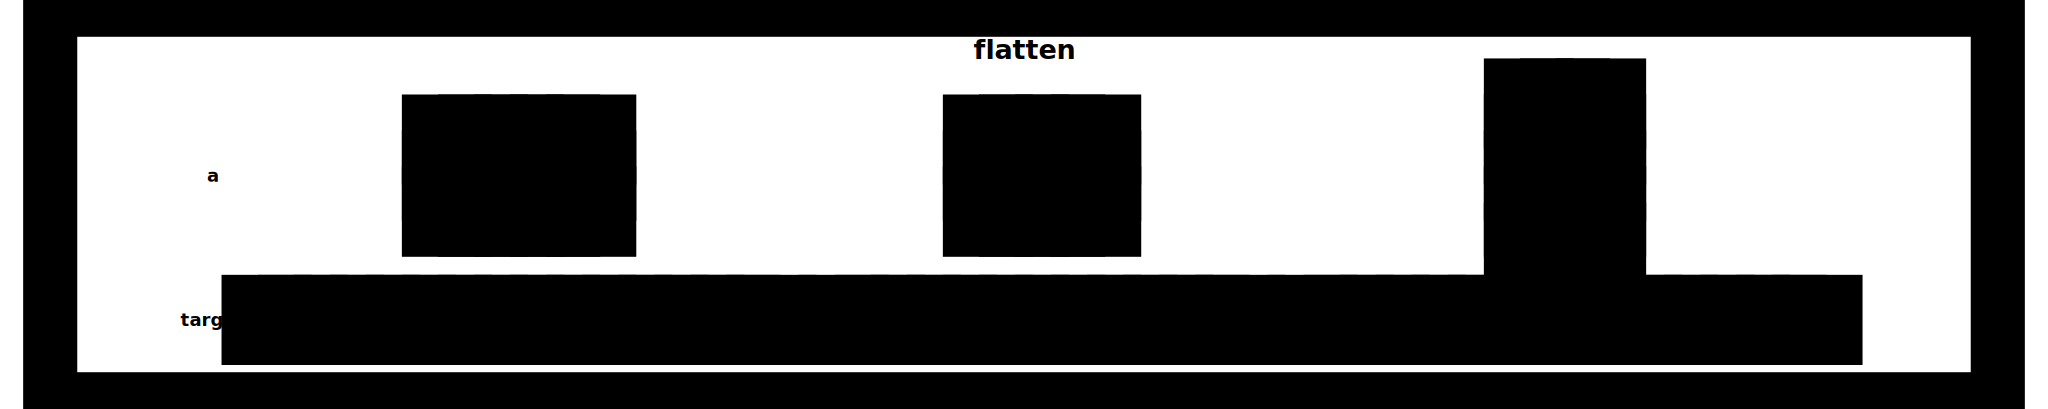

In [ ]:
def flatten_spec(a, out):
    k = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            out[k] = a[i][j]
            k += 1

def flatten(a: TT["i", "j"], i:int, j:int) -> TT["i * j"]:
    raise NotImplementedError

test_flatten = make_test("flatten", flatten, flatten_spec, add_sizes=["i", "j"])

In [ ]:
# run_test(test_flatten)

## Puzzle 18 - linspace

Compute [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

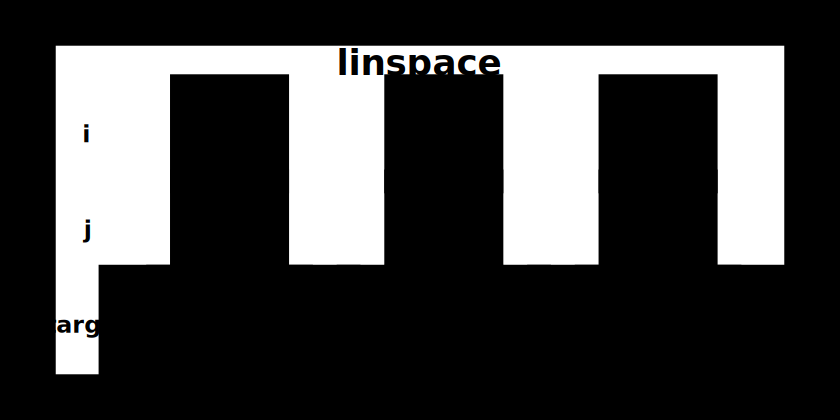

In [ ]:
def linspace_spec(i, j, out):
    for k in range(len(out)):
        out[k] = float(i + (j - i) * k / max(1, len(out) - 1))

def linspace(i: TT[1], j: TT[1], n: int) -> TT["n", float]:
    raise NotImplementedError

test_linspace = make_test("linspace", linspace, linspace_spec, add_sizes=["n"])

In [ ]:
# run_test(test_linspace)

## Puzzle 19 - heaviside

Compute [heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html)

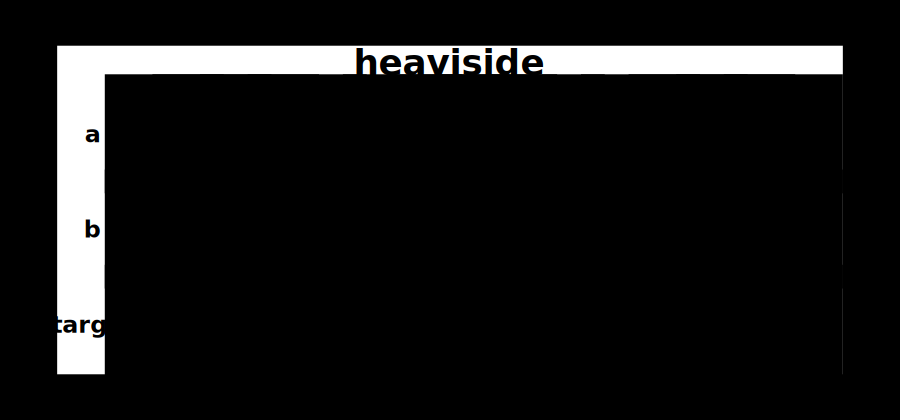

In [ ]:
def heaviside_spec(a, b, out):
    for k in range(len(out)):
        if a[k] == 0:
            out[k] = b[k]
        else:
            out[k] = int(a[k] > 0)

def heaviside(a: TT["i"], b: TT["i"]) -> TT["i"]:
    raise NotImplementedError

test_heaviside = make_test("heaviside", heaviside, heaviside_spec)

In [ ]:
# run_test(test_heaviside)

## Puzzle 20 - repeat (1d)

Compute [repeat](https://pytorch.org/docs/stable/generated/torch.Tensor.repeat.html)

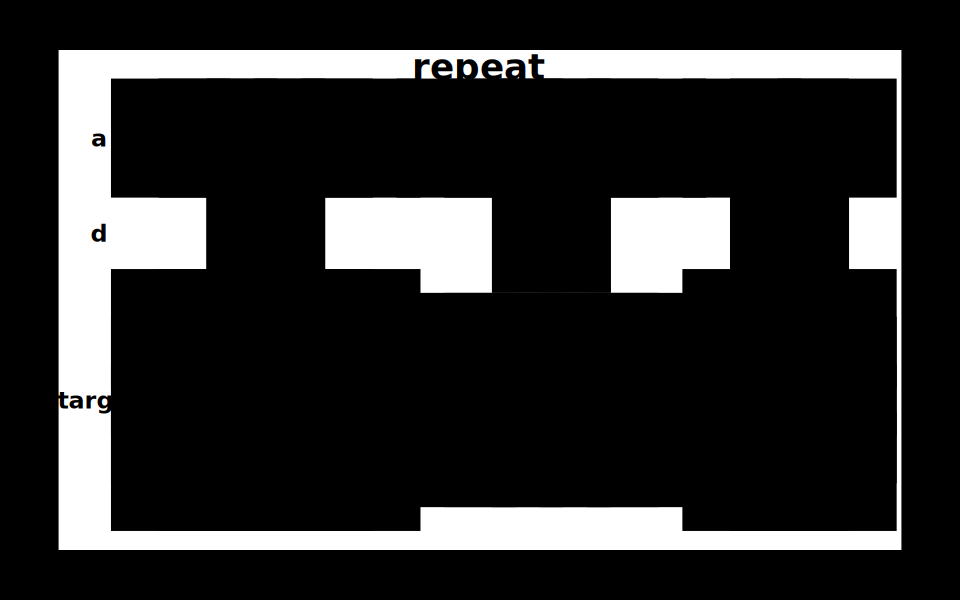

In [ ]:
def repeat_spec(a, d, out):
    for i in range(d[0]):
        for k in range(len(a)):
            out[i][k] = a[k]

def constraint_set(d):
    d["d"][0] = d["return"].shape[0]
    return d

            
def repeat(a: TT["i"], d: TT[1]) -> TT["d", "i"]:
    raise NotImplementedError

test_repeat = make_test("repeat", repeat, repeat_spec, constraint=constraint_set)


# ## Puzzle 21 - bucketize
#
# Compute [bucketize](https://pytorch.org/docs/stable/generated/torch.bucketize.html)

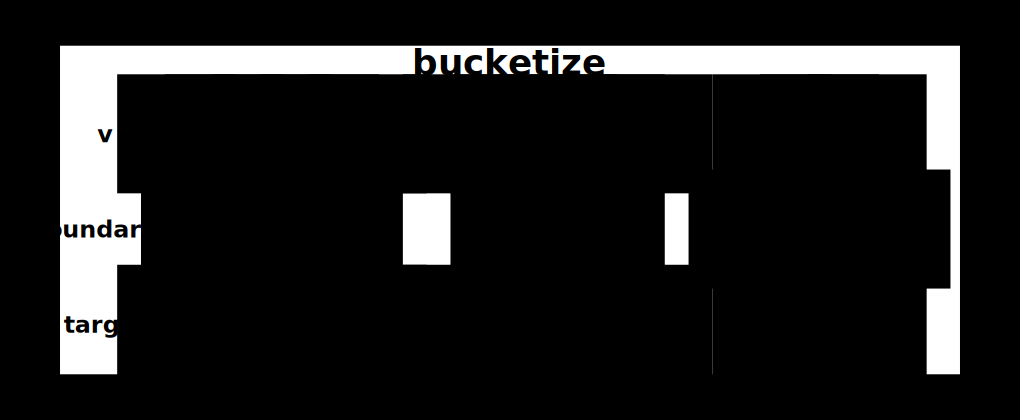

In [ ]:
def bucketize_spec(v, boundaries, out):
    for i, val in enumerate(v):
        out[i] = 0
        for j in range(len(boundaries)-1):
            if val >= boundaries[j]:
                out[i] = j + 1
        if val >= boundaries[-1]:
            out[i] = len(boundaries)


def constraint_set(d):
    d["boundaries"] = np.abs(d["boundaries"]).cumsum()
    return d

            
def bucketize(v: TT["i"], boundaries: TT["j"]) -> TT["i"]:
    raise NotImplementedError

test_bucketize = make_test("bucketize", bucketize, bucketize_spec,
                           constraint=constraint_set)


#
# # Speed Run Mode!
#
# What is the smallest you can make each of these?

In [ ]:
import inspect
fns = (ones, sum, outer, diag, eye, triu, cumsum, diff, vstack, roll, flip,
       compress, pad_to, sequence_mask, bincount, scatter_add)

for fn in fns:
    lines = [l for l in inspect.getsource(fn).split("\n") if not l.strip().startswith("#")]
    
    if len(lines) > 3:
        print(fn.__name__, len(lines[2]), "(more than 1 line)")
    else:
        print(fn.__name__, len(lines[1]))

ones 29
sum 29
outer 29
diag 29
eye 29
triu 29
cumsum 29
diff 29
vstack 29
roll 29
flip 29
compress 29
pad_to 29
sequence_mask 29
bincount 29
scatter_add 29
